In [2]:
!pip install git+https://github.com/oracle/Skater.git

  Cloning https://github.com/oracle/Skater.git to c:\users\iankk\appdata\local\temp\pip-req-build-l7zr1dbo
  Resolved https://github.com/oracle/Skater.git to commit 1ad4b4657a51ede7312fd9545e0db46316d481b3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 275.7/275.7 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 115.7/115.7 kB 563.9 kB/s eta 0:00:00
     ------------------------------------ 278.7/278.7 kB 903.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for skater: filename=skater-1.1.2b1-py3-none-any.whl size=120908 sha256=a6f69774197779ff82a0a42071360d159d487803b641aeb153ab984fbc

  Running command git clone --filter=blob:none --quiet https://github.com/oracle/Skater.git 'C:\Users\iankk\AppData\Local\Temp\pip-req-build-l7zr1dbo'
  on a case-insensitive filesystem) and only one from the same
  colliding group is in the working tree:

    'examples/python-deployed-model/README.md'
    'examples/python-deployed-model/readme.md'


  Cloning https://github.com/oracle/Skater.git to c:\users\iankk\appdata\local\temp\pip-req-build-75iqh1rt
  Resolved https://github.com/oracle/Skater.git to commit 1ad4b4657a51ede7312fd9545e0db46316d481b3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached lime-0.2.0.1-py3-none-any.whl
  Using cached multiprocess-0.70.14-py37-none-any.whl (115 kB)
  Using cached pydotplus-2.0.2-py3-none-any.whl
  Using cached bs4-0.0.1-py3-none-any.whl


  Running command git clone --filter=blob:none --quiet https://github.com/oracle/Skater.git 'C:\Users\iankk\AppData\Local\Temp\pip-req-build-75iqh1rt'
  on a case-insensitive filesystem) and only one from the same
  colliding group is in the working tree:

    'examples/python-deployed-model/README.md'
    'examples/python-deployed-model/readme.md'


  Created wheel for skater: filename=skater-1.1.2b1-py3-none-any.whl size=120908 sha256=f8fddf2a4c38ce8232d41d5d314ad64b2175e572cdc059119abe91799b6ca680
  Stored in directory: C:\Users\iankk\AppData\Local\Temp\pip-ephem-wheel-cache-ucq0io2t\wheels\bc\e1\05\2b5d1c01d1e582236157f04b759d2e140ccc6703f599148c72
Successfully built skater


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from tabulate import tabulate
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Perceptron
from timeit import timeit
from sklearn import datasets, tree
import datetime
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import pylab 
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
#from graphviz import Source
from IPython.display import Image
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy import interp
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn import metrics, tree
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
##from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
#from mlxtend.classifier import StackingClassifier
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import scipy
from sklearn.model_selection import GridSearchCV
from google.cloud import bigquery

In [2]:
# set display options to show all columns
pd.set_option('display.max_columns', None)
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Set the client for future queries to BigQuery
client = bigquery.Client(project = "continente-lced-feup")

In [3]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=vGwdCQiODehxgLPTQmiO2pPZkMmJcr&access_type=offline&code_challenge=x9fUlFNNgzLtkcMfXL-f7-Z4jXxF24O3L6O8xCoX59c&code_challenge_method=S256


Credentials saved to file: [C:\Users\iankk\AppData\Roaming\gcloud\application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "egd-project" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project owning t

## Data Loading

In [4]:
query = client.query("""
   SELECT *
   FROM 
       tables_staging.df_models
   LIMIT 100000
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,SKU,LOCATION_CD,CUSTOMER_ACCOUNT_NR_MASK,TIME_KEY,TRANSACTION_ID_MASK,POS_TP_CD,PRODUCT_KEY,QTY,GROSS_SLS_AMT,GENDER,FAMILY_MEMBERS,seg_lifestyle_cd,seg_lifestage_cd,LOC_BRAND_CD_1,PRODUCT_DSC,UNIT_BASE_CD_EXT,CAT_CD_EXT,CAT_DSC_EXT,BIZ_UNIT_CD_EXT,DEPARTMENT_CD_EXT,PRICE_RANGE,DAY,WEEK,DOW,MONTH,QUARTER,YEAR,CUST_NUM_ITEMS_BOUGHT,CUST_NUM_PRIOR_TRANSACTIONS,CUST_NUM_UNIQUE_CATEGORIES,CUST_DAYS_SINCE_LAST_TRANSACTION,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION,CUST_LAST_BASKET_SIZE,CUST_AVG_LAST_BASKET_SIZE,CAT_NUM_CAT_BOUGHT,CAT_CUST_BOUGHT_CAT,CAT_REORDER_NUM,CAT_CUS_ONLY_1T,DAYS_SINCE_LAST_PURCHASE,DAYS_SINCE_FIRST_PURCHASE,LABEL,__index_level_0__
0,4352541,2402,100226549.00,2022-12-26 00:00:00+00:00,9134157701516020967,P,4352541010002,1.00,5.29,F,1,3,4,302,"OVO KINDER MAXI C/SUPRESA T2,5 107G",2020104,202,0202 - doçaria,2,10,SECUNDARIA,26,52,0,12,4,2022,65,49,33,18,14.22,1,1.88,2677,1633,0.00,0,26092800000000000,52099200000000000,1,72526
1,5575493,3864,118844080.00,2022-12-26 00:00:00+00:00,9134157707347066222,P,5575493010001,3.00,10.47,None,<NA>,2,5,302,VT SOBREIRO PREM REG.P.SET 75CL,17010903,1701,1701 - v.classif.nac/estran,17,10,SECUNDARIA,26,52,0,12,4,2022,3,2,2,3,67.50,1,1.00,924,683,0.00,0,259200000000000,259200000000000,1,66195
2,7108149,256,50728612.00,2022-12-26 00:00:00+00:00,9134159758384269821,P,7108149010001,1.00,1.89,F,<NA>,3,5,303,PÃO DE LEITE BIMBO 280G,16030301,1603,1603 - pão industrial&tosta,16,12,SECUNDARIA,26,52,0,12,4,2022,23,19,16,34,37.95,1,1.32,2030,734,0.00,0,6134400000000000,9763200000000000,1,38612
3,6231714,5767,87611427.00,2022-12-26 00:00:00+00:00,9134157707347927618,P,6231714010001,1.00,3.65,M,1,1,5,302,CAFÉ RISTRETTO INTENSO 10 CNT DG 16CÁP,14030401,1403,1403 - bebidas quentes,14,10,PROPRIA,26,52,0,12,4,2022,38,29,24,32,24.21,2,1.59,1717,1086,0.00,0,22982400000000000,22982400000000000,1,63142
4,7377316,1703,80386558.00,2022-12-26 00:00:00+00:00,9134159801494068566,P,7377316010002,1.00,2.24,M,0,3,4,302,SNACKS BATATA NATAS&CEBOLA PRINGLES 175G,1010201,101,0101 - aperitivos,1,10,SECUNDARIA,26,52,0,12,4,2022,27,24,16,2,29.58,1,1.17,2343,1194,0.00,0,4147200000000000,28425600000000000,1,49945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2807372,5759,58226070.00,2021-07-21 00:00:00+00:00,7457186517698466745,P,2807372010001,1.00,1.29,M,2,1,4,302,REF.S/GAS LIMONADA B! 1L,3020401,302,0302 - refrigerantes,3,10,?,21,29,2,7,3,2021,16,13,13,8,15.08,1,1.31,750,911,0.00,1,0,0,0,27729
99996,4679597,6154,11626068.00,2021-07-21 00:00:00+00:00,7457186568010573386,P,4679597010001,2.00,1.98,F,2,1,4,302,LEITE MAGRO 0% LACTOSE MIMOSA 1L,8010452,801,0801 - leites e natas,8,10,SECUNDARIA,21,29,2,7,3,2021,21,14,15,11,14.14,2,1.93,762,354,0.00,1,0,0,0,16228
99997,7207958,1700,34637876.00,2021-07-21 00:00:00+00:00,7457186623997285469,P,7207958010001,1.00,2.99,F,0,1,5,303,6 MINIBUR BETERRABA GREEN CUISINE 270GR,7020601,702,0702 - refei�ões congeladas,7,10,SECUNDARIA,21,29,2,7,3,2021,2,1,2,171,171.00,1,1.00,280,331,0.00,1,0,0,0,70012
99998,6930046,5746,58294948.00,2021-07-21 00:00:00+00:00,7457186568010493363,P,6930046010001,1.00,2.99,F,3,2,3,302,CERV S/ ALC RADLER ZERO LIMÃO T/P 4X33CL,3030605,303,0303 - cervejas,3,10,SECUNDARIA,21,29,2,7,3,2021,3,2,3,105,74.50,1,1.00,251,334,0.00,1,0,0,0,30495


In [5]:
#wines = wines_binary_norm.sample(frac=1, random_state=101).reset_index(drop=True)
y_tp = df['LABEL']
cols = df.columns
cols = list(cols.drop(['LABEL', '__index_level_0__','SKU','LOCATION_CD','POS_TP_CD','PRODUCT_KEY','GENDER','FAMILY_MEMBERS','seg_lifestyle_cd','seg_lifestage_cd','LOC_BRAND_CD_1','PRODUCT_DSC','UNIT_BASE_CD_EXT','TIME_KEY','CAT_DSC_EXT','BIZ_UNIT_CD_EXT','DEPARTMENT_CD_EXT', 'PRICE_RANGE']))

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, cols], y_tp, test_size=0.20, random_state=101)

In [6]:
def get_results(model, name, data, true_labels, target_names = ['No buy', 'Buy'], results=None, reasume=False):

    if hasattr(model, 'layers'):
        param = wtp_dnn_model.history.params
        best = np.mean(history.history['val_accuracy'])
        predicted_labels = np.argmax(model.predict(data) , axis=-1)
        im_model = InMemoryModel(model.predict, examples=data, target_names=target_names)

    else:
        param = gs.best_params_
        best = gs.best_score_
        predicted_labels = model.predict(data).ravel()
        if hasattr(model, 'predict_proba'):
            im_model = InMemoryModel(model.predict_proba, examples=data, target_names=target_names)
        elif hasattr(clf, 'decision_function'):
            im_model = InMemoryModel(model.decision_function, examples=data, target_names=target_names)
        
    print('Mean Best Accuracy: {:2.2%}'.format(best))
    print('-'*60)
    print('Best Parameters:')
    print(param)
    print('-'*60)
    
    y_pred = model.predict(data).ravel()
    
    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels, target_names = target_names)
    if len(target_names)==2:
        ras = roc_auc_score(y_true=true_labels, y_score=y_pred)
    else:
        roc_auc_multiclass, ras = roc_auc_score_multiclass(y_true=true_labels, y_score=y_pred, target_names=target_names)
        print('\nROC AUC Score by Classes:\n',roc_auc_multiclass)
        print('-'*60)

    print('\n\n              ROC AUC Score: {:2.2%}'.format(ras))
    prob, score_roc, roc_auc = plot_model_roc_curve(model, data, true_labels, label_encoder=None, class_names=target_names)
    
    #interpreter = Interpretation(data, feature_names=cols)
    #plots = interpreter.feature_importance.plot_feature_importance(im_model, progressbar=False, n_jobs=1, ascending=True)
    
    r1 = pd.DataFrame([(prob, best, np.round(accuracy_score(true_labels, predicted_labels), 4), 
                         ras, roc_auc)], index = [name],
                         columns = ['Prob', 'CV Accuracy', 'Accuracy', 'ROC AUC Score', 'ROC Area'])
    if reasume:
        results = r1
    elif (name in results.index):        
        results.loc[[name], :] = r1
    else: 
        results = results.append(r1)
        
    return results


def roc_auc_score_multiclass(y_true, y_score, target_names, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_true)
  roc_auc_dict = {}
  mean_roc_auc = 0
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_y_true = [0 if x in other_class else 1 for x in y_true]
    new_y_score = [0 if x in other_class else 1 for x in y_score]
    num_new_y_true = sum(new_y_true)

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_y_true, new_y_score, average = average)
    roc_auc_dict[target_names[per_class]] = np.round(roc_auc, 4)
    mean_roc_auc += num_new_y_true * np.round(roc_auc, 4)
    
  mean_roc_auc = mean_roc_auc/len(y_true)  
  return roc_auc_dict, mean_roc_auc

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(true_labels, predicted_labels)))
    print('Precision: {:2.2%} '.format(metrics.precision_score(true_labels, predicted_labels, average='weighted')))
    print('Recall:    {:2.2%} '.format(metrics.recall_score(true_labels, predicted_labels, average='weighted')))
    print('F1 Score:  {:2.2%} '.format(metrics.f1_score(true_labels, predicted_labels, average='weighted')))
                        

def train_predict_model(classifier,  train_features, train_labels,  test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, target_names):
    
    total_classes = len(target_names)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], target_names], codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], target_names], codes=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, target_names):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=target_names) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels, target_names):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
   
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prb = clf.predict_proba(features)
            if prb.shape[1] > 1:
                y_score = prb[:, prb.shape[1]-1] 
            else:
                y_score = clf.predict(features).ravel()
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            print("\n")
            #raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(true_labels, y_score)      
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {0:3.2%})'.format(roc_auc), linewidth=2.5)
        
    elif n_classes > 2:
        if  hasattr(clf, 'clfs_'):
            y_labels = label_binarize(true_labels, classes=list(range(len(class_labels))))
        else:
            y_labels = label_binarize(true_labels, classes=class_labels)
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
            
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_labels[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_labels.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(12, 6))
        plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["macro"]), linewidth=3)
  
        for i, label in enumerate(class_names):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:2.2%})'
                                           ''.format(label, roc_auc[i]), linewidth=2, linestyle=':')
            
        roc_auc = roc_auc["macro"]   
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    
    return prob, y_score, roc_auc

## Logistic Regression

In [7]:
y_train.dtype

Int64Dtype()

In [8]:
#y_train = LabelEncoder().fit_transform(y_train)

In [9]:
#y_train #isto está bem?

### Logistic Regression Test

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Mean Best Accuracy: 35.50%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  58.39% 
Precision: 61.80% 
Recall:    58.39% 
F1 Score:  56.05% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.55      0.83      0.66      9699
         Buy       0.68      0.36      0.47     10301

    accuracy                           0.58     20000
   macro avg       0.62      0.59      0.56     20000
weighted avg       0.62      0.58      0.56     20000


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy       8011  1688
        Buy          6633  3668


              ROC AUC Scor

TypeError: 'NoneType' object is not subscriptable

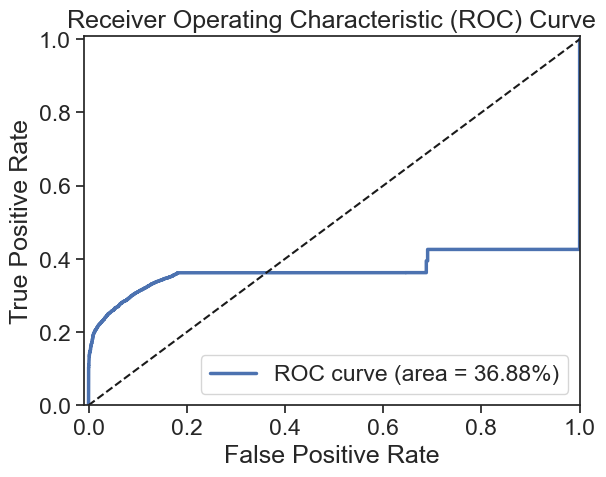

In [27]:
LR = LogisticRegression()

# LR = Pipeline([
#         #('sel', select_fetaures(select_cols=list(shadow))),
#       #  ('scl', StandardScaler()),
#         #('lda', LDA(store_covariance=True)),
#         ('gs', gs)
#  ]) 

grid_values = {'penalty': ['none', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

gs = GridSearchCV(estimator=LR, param_grid=grid_values, scoring='recall', cv=10, verbose=1, n_jobs=-1)
gs.fit(X_train,y_train)

best_LR = LogisticRegression(**gs.best_params_)
best_LR.fit(X_train, y_train)



results = get_results(best_LR, 'Logistic Regression', X_test, y_test, reasume=True)

In [ ]:
df.shape

(100000, 42)

In [ ]:
#Check Null values

# Reset the index of the columns
df.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
#y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
### Change the type of all the columns to INT
X_test = X_test.astype(int)
X_train = X_train.astype(int)
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [23]:
y_test = y_test.astype(bool)
y_train = y_train.astype(bool)

In [25]:
y_test

56324     True
52881    False
60647     True
42046     True
9912     False
         ...  
92312    False
12831    False
78956    False
57122    False
20937     True
Name: LABEL, Length: 20000, dtype: bool

In [14]:
Y_train_ravel = y_train.values.ravel()